In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import fastf1
from fastf1.core import Laps
import os
import seaborn as sns
import numpy as np
import utilities as ut

In [2]:
#Generating cache folder
cache_folder = 'cache_folder'
if not os.path.exists(cache_folder):
    os.makedirs(cache_folder)

fastf1.Cache.enable_cache(cache_folder)

In [5]:
quali = fastf1.get_session(2025, 'Saudi Arabia','Q')
quali.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loadin

In [6]:
quali_df = quali.laps
quali_df.tail(11)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
278,0 days 00:30:21.955000,BOR,5,NaT,7.0,4.0,0 days 00:28:24.981000,NaT,NaT,0 days 00:00:36.919000,...,True,Kick Sauber,0 days 00:24:54.326000,2025-04-19 17:11:37.965,1,NaN,False,,False,False
279,0 days 00:32:41.037000,BOR,5,0 days 00:02:19.082000,8.0,4.0,NaT,0 days 00:32:39.935000,0 days 00:00:58.215000,0 days 00:00:38.437000,...,True,Kick Sauber,0 days 00:30:21.955000,2025-04-19 17:17:05.594,12,NaN,False,,False,False
280,0 days 00:16:32.058000,STR,18,NaT,1.0,1.0,0 days 00:14:29.693000,NaT,NaT,0 days 00:00:31.133000,...,True,Aston Martin,0 days 00:14:29.693000,2025-04-19 17:01:13.332,1,NaN,False,,False,False
281,0 days 00:18:01.147000,STR,18,0 days 00:01:29.089000,2.0,1.0,NaT,NaT,0 days 00:00:32.281000,0 days 00:00:28.143000,...,True,Aston Martin,0 days 00:16:32.058000,2025-04-19 17:03:15.697,1,NaN,False,,False,True
282,0 days 00:19:58.120000,STR,18,0 days 00:01:56.973000,3.0,1.0,NaT,0 days 00:19:57.003000,0 days 00:00:40.427000,0 days 00:00:35.317000,...,True,Aston Martin,0 days 00:18:01.147000,2025-04-19 17:04:44.786,1,NaN,False,,False,False
283,0 days 00:22:20.595000,STR,18,0 days 00:02:22.475000,4.0,2.0,0 days 00:20:19.409000,NaT,0 days 00:01:13.157000,0 days 00:00:32.094000,...,True,Aston Martin,0 days 00:19:58.120000,2025-04-19 17:06:41.759,1,NaN,False,,False,False
284,0 days 00:23:49.240000,STR,18,0 days 00:01:28.645000,5.0,2.0,NaT,NaT,0 days 00:00:32.072000,0 days 00:00:28.054000,...,True,Aston Martin,0 days 00:22:20.595000,2025-04-19 17:09:04.234,1,NaN,False,,False,True
285,0 days 00:25:40.885000,STR,18,0 days 00:01:51.645000,6.0,2.0,NaT,0 days 00:25:39.765000,0 days 00:00:40.013000,0 days 00:00:32.239000,...,True,Aston Martin,0 days 00:23:49.240000,2025-04-19 17:10:32.879,1,NaN,False,,False,False
286,0 days 00:30:04.281000,STR,18,NaT,7.0,3.0,0 days 00:28:07.363000,NaT,NaT,0 days 00:00:33.825000,...,True,Aston Martin,0 days 00:25:40.885000,2025-04-19 17:12:24.524,1,NaN,False,,False,False
287,0 days 00:31:33.466000,STR,18,0 days 00:01:29.185000,8.0,3.0,NaT,NaT,0 days 00:00:32.537000,0 days 00:00:28.170000,...,True,Aston Martin,0 days 00:30:04.281000,2025-04-19 17:16:47.920,12,NaN,False,,False,True


In [7]:
quali_df = ut.generate_times_in_seconds(quali_df)

/Users/dario/Documents/Python Stuff/F1/utilities.py:178: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  improv_df = pd.concat([improv_df,pd.DataFrame(ideal,columns=improv_df.columns,index=[i])])


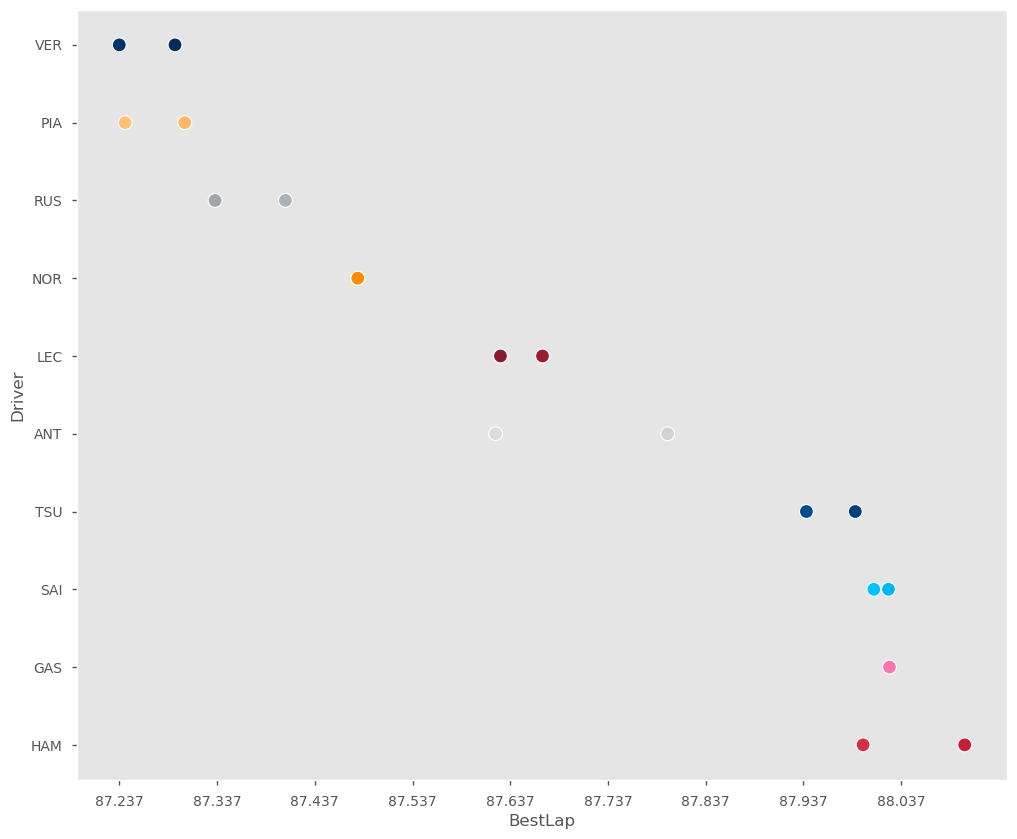

In [9]:
improv_df = ut.generate_improv_df(quali_df)
ut.ideal_lap_chart(improv_df)

/Users/dario/Documents/Python Stuff/F1/utilities.py:292: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(custom_y_ticks_labels)


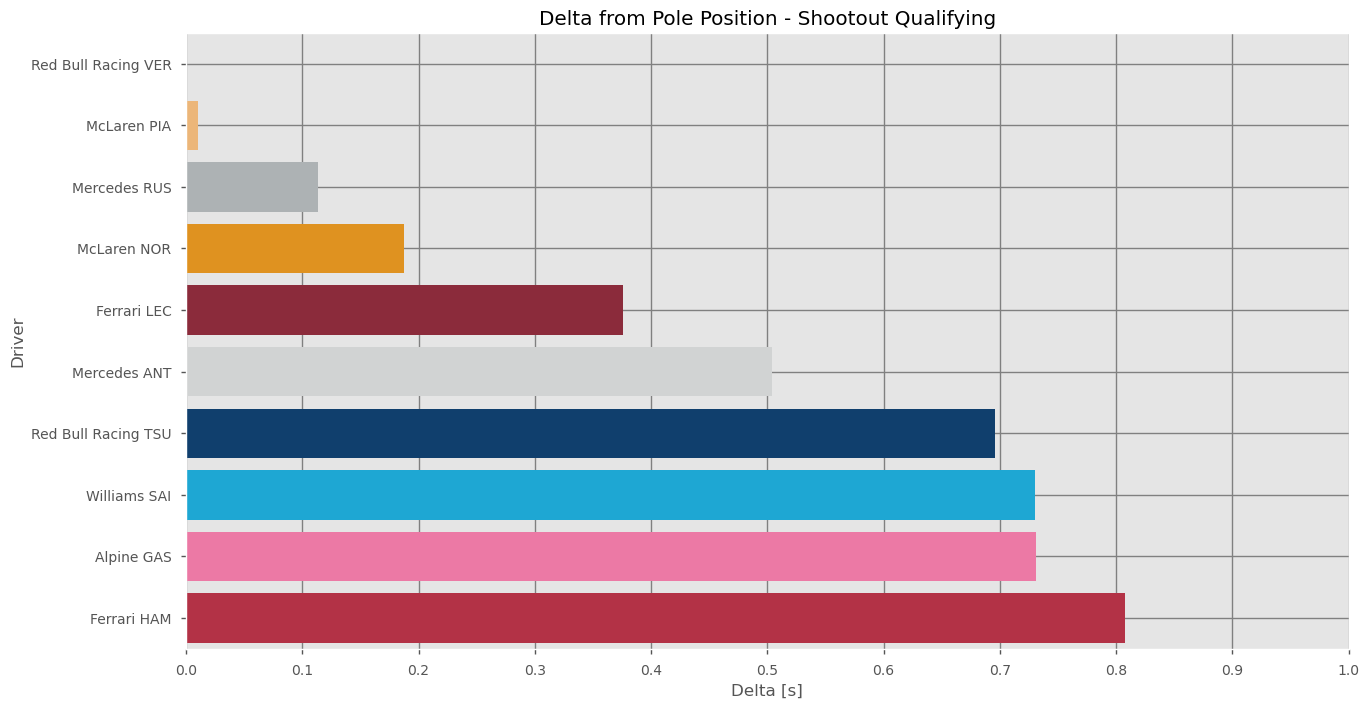

In [10]:
ut.delta_from_pole_chart(quali_df)

## Race

In [3]:
race = fastf1.get_session(2025,'Saudi Arabia', 'R')
race.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '16', '4', '63', '12', '44', '55', '23', '6', '14', '30', '87', '31', '27', '18', '7', '5', '22', '10']


In [4]:
race_df = race.laps

In [5]:
race_df = ut.generate_times_in_seconds(race_df)

/Users/dario/Documents/Python Stuff/F1/utilities.py:215: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


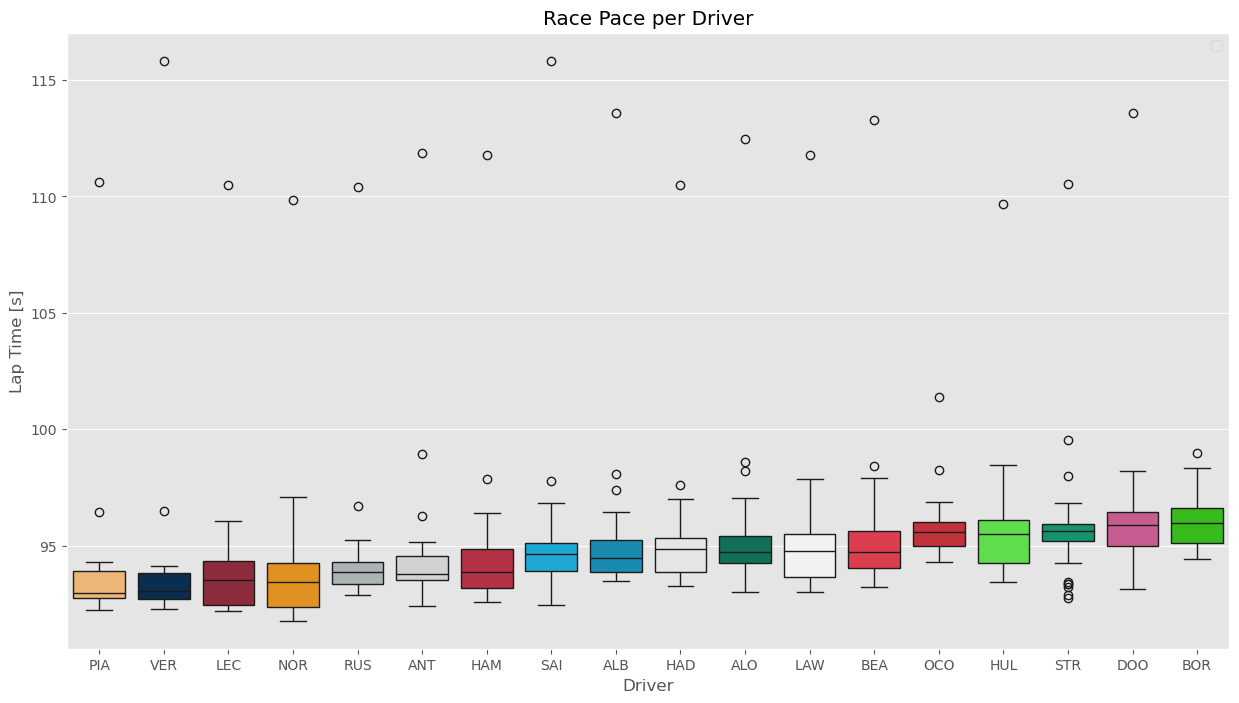

In [6]:
ut.race_pace_chart(race_df)

In [7]:
ut.race_pace_comparison_chart(race_df,'LEC','HAM')

PitLap column missing, use utilities.one_hot_pit_laps


In [8]:
race_df = ut.one_hot_pit_laps(race_df)

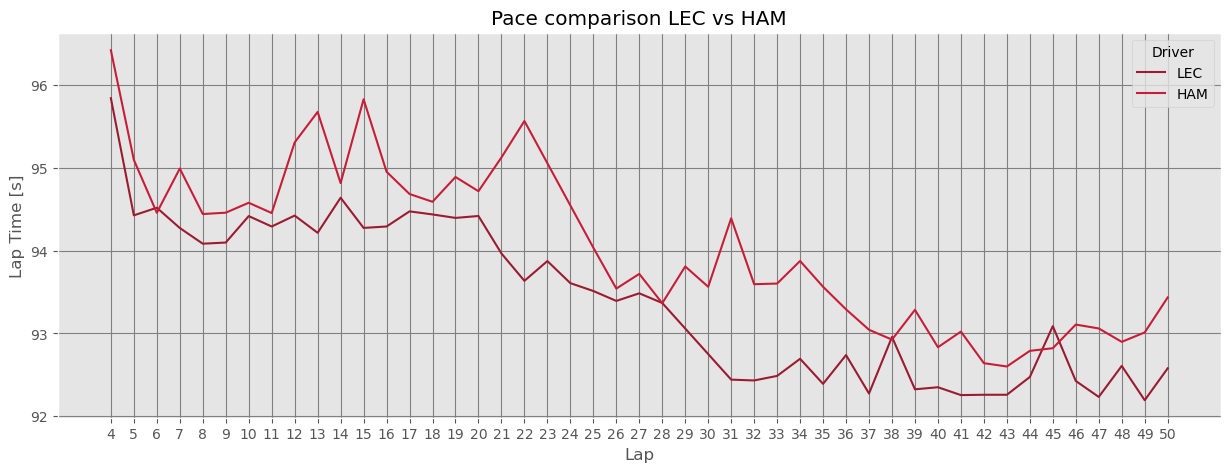

In [9]:
ut.race_pace_comparison_chart(race_df,'LEC','HAM')

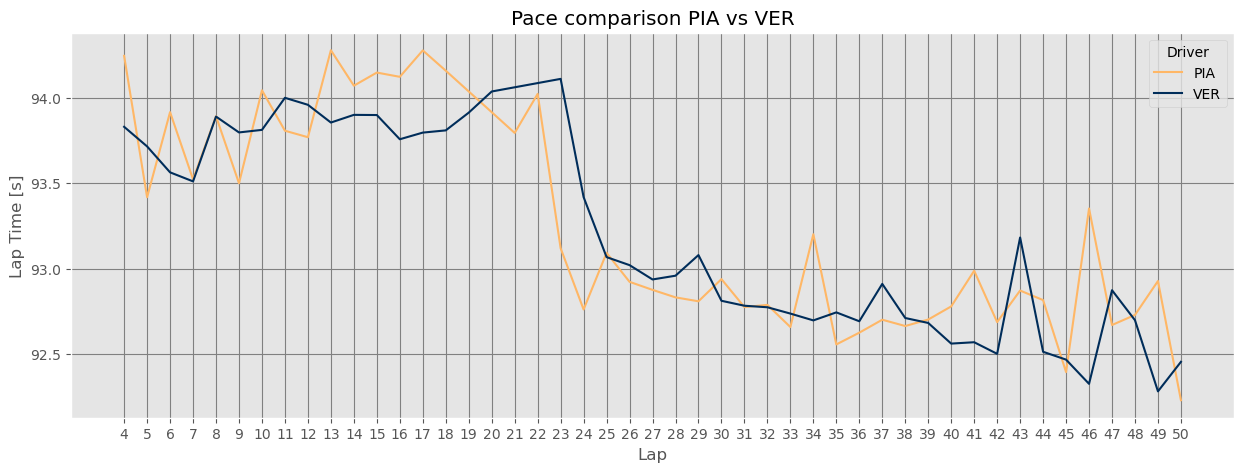

In [10]:
ut.race_pace_comparison_chart(race_df,'PIA','VER')

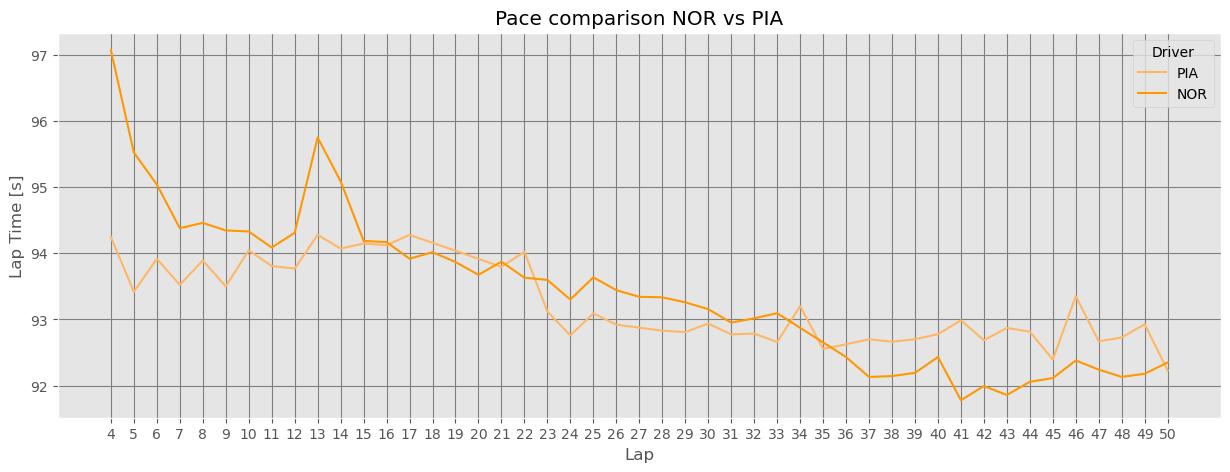

In [11]:
ut.race_pace_comparison_chart(race_df,'NOR','PIA')